# Generate displacement data using OPERA CSLC-S1 from ASF DAAC

---    

### Data Used in the Example:   

- **10 meter (Northing) x 5 meter (Easting) North America OPERA Coregistered Single Look Complex from Sentinel-1 products**
    - This dataset contains Level-2 OPERA provisional coregistered single-look-complex (CSLC) data from Sentinel-1 (S1). <span style="color:red"> The data in this example are geocoded CSLC-S1 data covering the volcanoes in the Big Island, Hawaii</span>. 
    
    - The OPERA project is generating geocoded burst-wise CSLC-S1 products over North America which includes USA and US Territories within 200 km from the US border, Canada, and all mainland countries from the southern US border down to and including Panama. Each pixel within a burst SLC is represented by a complex number and contains both the amplitude and phase information. The CSLC-S1 products are distributed over projected map coordinates using the Universal Transverse Mercator (UTM) projection with spacing in the X- and Y-directions of 5 m and 10 m, respectively. Each OPERA CSLC-S1 product is distributed as a HDF5 file following the CF-1.8 convention with separate groups containing the data raster layers, the low-resolution correction layers, and relevant product metadata.

    - For more information about the OPERA project and other products please visit our website at https://www.jpl.nasa.gov/go/opera .

Please refer to the [OPERA Product Specification Document](https://d2pn8kiwq2w21t.cloudfront.net/documents/ProductSpec_CSLC_URS314199.pdf) for details about the CSLC-S1 product.

*Prepared by M. Grace Bato*

---

## 0. Setup your conda environment

Assuming you have [miniconda](https://docs.conda.io/projects/miniconda/en/latest/miniconda-install.html) or conda installed. Open your terminal and run the following:
```
> conda create -n opera_cslc --yes
> conda activate opera_cslc
> conda install -c conda-forge mamba --yes
> mamba env update -p ${CONDA_PREFIX} --file "opera_cslc_env.yml"
> pip install -U git+https://github.com/scottstanie/dolphin.git@main
```

---    

## 1. Load Python modules

In [1]:
## Load necessary modules
%load_ext watermark

import asf_search as asf
import geopandas as gpd

import numpy as np
import getpass
import folium
import datetime as dt
from shapely.geometry import box
import rioxarray
import numpy as np
from dolphin.workflows import _cli_config as dconfig
from dolphin.workflows import _cli_run as drun

%watermark --iversions

import os

geopandas : 0.14.1
asf_search: 6.7.2
dolphin   : 0.7.0.post1.dev15+gd7bc853
numpy     : 1.26.2
folium    : 0.15.1
rioxarray : 0.15.0



In [2]:
## Load plotting module
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
## Load pandas and setup config
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
## Avoid lots of these warnings printing to notebook from asf_search
import warnings
warnings.filterwarnings('ignore')

## 2. Query and download OPERA CSLCs using `asf_search`

In [5]:
## Enter user-defined parameters
aoi = box(-155.88, 19.0, -155.014, 20.1962)
wavelength = 0.056
orbitPass = asf.ASCENDING
pathNumber = 124
startDate = '2023-12-01T00:00:00Z'
endDate = '2023-12-28T23:59:59Z'
savedir = './BigIsland'

In [6]:
## Search for OPERA CSLC data in ASF DAAC
search_params = dict(
    intersectsWith= aoi.wkt,
    dataset='OPERA-S1',
    processingLevel='CSLC',
    flightDirection = orbitPass,
    start=startDate,
    end=endDate
)

## Return results
results = asf.search(**search_params)
len(results)

85

In [7]:
## Display the queried data
gf = gpd.GeoDataFrame.from_features(results.geojson(), crs='EPSG:4326')
gf.head()

geometry beamModeType  \
0  POLYGON ((-156.15680 20.12214, -155.30759 20.2...           IW   
1  POLYGON ((-155.30681 20.16151, -154.55619 20.2...           IW   
2  POLYGON ((-156.12276 19.95542, -155.27450 20.1...           IW   
3  POLYGON ((-155.27364 19.99466, -154.52386 20.1...           IW   
4  POLYGON ((-156.08868 19.78844, -155.24136 19.9...           IW   

                                              browse bytes centerLat  \
0  [https://datapool.asf.alaska.edu/BROWSE/OPERA-...  None      None   
1  [https://datapool.asf.alaska.edu/BROWSE/OPERA-...  None      None   
2  [https://datapool.asf.alaska.edu/BROWSE/OPERA-...  None      None   
3  [https://datapool.asf.alaska.edu/BROWSE/OPERA-...  None      None   
4  [https://datapool.asf.alaska.edu/BROWSE/OPERA-...  None      None   

  centerLon faradayRotation  \
0      None            None   
1      None            None   
2      None            None   
3      None            None   
4      None            None   

                                              fileID flightDirection  \
0  OPERA_L2_CSLC-S1_T124-264311-IW2_20231226T0431...       ASCENDING   
1  OPERA_L2_CSLC-S1_T124-264310-IW3_20231226T0431...       ASCENDING   
2  OPERA_L2_CSLC-S1_T124-264310-IW2_20231226T0431...       ASCENDING   
3  OPERA_L2_CSLC-S1_T124-264309-IW3_20231226T0431...       ASCENDING   
4  OPERA_L2_CSLC-S1_T124-264309-IW2_20231226T0431...       ASCENDING   

                         groupID granuleType insarStackId md5sum  \
0  S1A_IWDV_0062_0067_051821_124        None         None   None   
1  S1A_IWDV_0062_0067_051821_124        None         None   None   
2  S1A_IWDV_0062_0067_051821_124        None         None   None   
3  S1A_IWDV_0062_0067_051821_124        None         None   None   
4  S1A_IWDV_0062_0067_051821_124        None         None   None   

  offNadirAngle  orbit  pathNumber     platform pointingAngle polarization  \
0          None  51821         124  Sentinel-1A          None         [VV]   
1          None  51821         124  Sentinel-1A          None         [VV]   
2          None  51821         124  Sentinel-1A          None         [VV]   
3          None  51821         124  Sentinel-1A          None         [VV]   
4          None  51821         124  Sentinel-1A          None         [VV]   

         processingDate processingLevel  \
0  2023-12-27T08:13:33Z            CSLC   
1  2023-12-27T08:24:38Z            CSLC   
2  2023-12-27T08:12:07Z            CSLC   
3  2023-12-27T08:23:22Z            CSLC   
4  2023-12-27T08:10:42Z            CSLC   

                                           sceneName sensor  \
0  OPERA_L2_CSLC-S1_T124-264311-IW2_20231226T0431...  C-SAR   
1  OPERA_L2_CSLC-S1_T124-264310-IW3_20231226T0431...  C-SAR   
2  OPERA_L2_CSLC-S1_T124-264310-IW2_20231226T0431...  C-SAR   
3  OPERA_L2_CSLC-S1_T124-264309-IW3_20231226T0431...  C-SAR   
4  OPERA_L2_CSLC-S1_T124-264309-IW2_20231226T0431...  C-SAR   

              startTime              stopTime  \
0  2023-12-26T04:31:33Z  2023-12-26T04:31:36Z   
1  2023-12-26T04:31:31Z  2023-12-26T04:31:34Z   
2  2023-12-26T04:31:30Z  2023-12-26T04:31:33Z   
3  2023-12-26T04:31:28Z  2023-12-26T04:31:31Z   
4  2023-12-26T04:31:27Z  2023-12-26T04:31:30Z   

                                                 url pgeVersion  \
0  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...      2.1.0   
1  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...      2.1.0   
2  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...      2.1.0   
3  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...      2.1.0   
4  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...      2.1.0   

                                            fileName frameNumber beamMode  \
0  OPERA_L2_CSLC-S1_T124-264311-IW2_20231226T0431...        None       IW   
1  OPERA_L2_CSLC-S1_T124-264310-IW3_20231226T0431...        None       IW   
2  OPERA_L2_CSLC-S1_T124-264310-IW2_20231226T0431...        None       IW   
3  OPERA_L2_CSLC-S1_T124-264309-IW3_20231226T0431...  

In [8]:
## Filter data based on specified track number
gf = gf[gf.pathNumber==pathNumber]
cslc = gf[['operaBurstID','startTime', 'stopTime', 'url', 'geometry']]
cslc['startTime'] = pd.to_datetime(cslc.startTime).dt.date
cslc['stopTime'] = pd.to_datetime(cslc.stopTime).dt.date
cslc = cslc.drop_duplicates(subset=['operaBurstID', 'startTime'], ignore_index=True)
cslc

operaBurstID   startTime    stopTime  \
0   T124_264311_IW2  2023-12-26  2023-12-26   
1   T124_264310_IW3  2023-12-26  2023-12-26   
2   T124_264310_IW2  2023-12-26  2023-12-26   
3   T124_264309_IW3  2023-12-26  2023-12-26   
4   T124_264309_IW2  2023-12-26  2023-12-26   
5   T124_264308_IW3  2023-12-26  2023-12-26   
6   T124_264308_IW2  2023-12-26  2023-12-26   
7   T124_264307_IW3  2023-12-26  2023-12-26   
8   T124_264307_IW2  2023-12-26  2023-12-26   
9   T124_264306_IW3  2023-12-26  2023-12-26   
10  T124_264306_IW2  2023-12-26  2023-12-26   
11  T124_264305_IW3  2023-12-26  2023-12-26   
12  T124_264305_IW2  2023-12-26  2023-12-26   
13  T124_264304_IW3  2023-12-26  2023-12-26   
14  T124_264304_IW2  2023-12-26  2023-12-26   
15  T124_264303_IW3  2023-12-26  2023-12-26   
16  T124_264303_IW2  2023-12-26  2023-12-26   
17  T124_264302_IW3  2023-12-26  2023-12-26   
18  T124_264311_IW2  2023-12-14  2023-12-14   
19  T124_264310_IW3  2023-12-14  2023-12-14   
20  T124_264310_IW2  2023-12-14  2023-12-14   
21  T124_264309_IW3  2023-12-14  2023-12-14   
22  T124_264309_IW2  2023-12-14  2023-12-14   
23  T124_264308_IW3  2023-12-14  2023-12-14   
24  T124_264308_IW2  2023-12-14  2023-12-14   
25  T124_264307_IW3  2023-12-14  2023-12-14   
26  T124_264307_IW2  2023-12-14  2023-12-14   
27  T124_264306_IW3  2023-12-14  2023-12-14   
28  T124_264306_IW2  2023-12-14  2023-12-14   
29  T124_264305_IW3  2023-12-14  2023-12-14   
30  T124_264305_IW2  2023-12-14  2023-12-14   
31  T124_264304_IW3  2023-12-14  2023-12-14   
32  T124_264304_IW2  2023-12-14  2023-12-14   
33  T124_264303_IW3  2023-12-14  2023-12-14   
34  T124_264303_IW2  2023-12-14  2023-12-14   
35  T124_264302_IW3  2023-12-14  2023-12-14   
36  T124_264311_IW2  2023-12-02  2023-12-02   
37  T124_264310_IW3  2023-12-02  2023-12-02   
38  T124_264310_IW2  2023-12-02  2023-12-02   
39  T124_264309_IW3  2023-12-02  2023-12-02   
40  T124_264309_IW2  2023-12-02  2023-12-02   
41  T124_264308_IW3  2023-12-02  2023-12-02   
42  T124_264308_IW2  2023-12-02  2023-12-02   
43  T124_264307_IW3  2023-12-02  2023-12-02   
44  T124_264307_IW2  2023-12-02  2023-12-02   
45  T124_264306_IW3  2023-12-02  2023-12-02   
46  T124_264306_IW2  2023-12-02  2023-12-02   
47  T124_264305_IW3  2023-12-02  2023-12-02   
48  T124_264305_IW2  2023-12-02  2023-12-02   
49  T124_264304_IW3  2023-12-02  2023-12-02   
50  T124_264304_IW2  2023-12-02  2023-12-02   
51  T124_264303_IW3  2023-12-02  2023-12-02   
52  T124_264303_IW2  2023-12-02  2023-12-02   
53  T124_264302_IW3  2023-12-02  2023-12-02   

                                                  url  \
0   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
1   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
2   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
3   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
4   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
5   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
6   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
7   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
8   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
9   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
10  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
11  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
12  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
13  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
14  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
15  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
16  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
17  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
18  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
19  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
20  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
21  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
22  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
23  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...

In [9]:
## Choose the reference and secondary dates
ref = cslc.startTime[0]
sec = cslc.startTime[18]

## Drop other dates
cslc = cslc.loc[cslc.startTime.isin([ref,sec])]
cslc

operaBurstID   startTime    stopTime  \
0   T124_264311_IW2  2023-12-26  2023-12-26   
1   T124_264310_IW3  2023-12-26  2023-12-26   
2   T124_264310_IW2  2023-12-26  2023-12-26   
3   T124_264309_IW3  2023-12-26  2023-12-26   
4   T124_264309_IW2  2023-12-26  2023-12-26   
5   T124_264308_IW3  2023-12-26  2023-12-26   
6   T124_264308_IW2  2023-12-26  2023-12-26   
7   T124_264307_IW3  2023-12-26  2023-12-26   
8   T124_264307_IW2  2023-12-26  2023-12-26   
9   T124_264306_IW3  2023-12-26  2023-12-26   
10  T124_264306_IW2  2023-12-26  2023-12-26   
11  T124_264305_IW3  2023-12-26  2023-12-26   
12  T124_264305_IW2  2023-12-26  2023-12-26   
13  T124_264304_IW3  2023-12-26  2023-12-26   
14  T124_264304_IW2  2023-12-26  2023-12-26   
15  T124_264303_IW3  2023-12-26  2023-12-26   
16  T124_264303_IW2  2023-12-26  2023-12-26   
17  T124_264302_IW3  2023-12-26  2023-12-26   
18  T124_264311_IW2  2023-12-14  2023-12-14   
19  T124_264310_IW3  2023-12-14  2023-12-14   
20  T124_264310_IW2  2023-12-14  2023-12-14   
21  T124_264309_IW3  2023-12-14  2023-12-14   
22  T124_264309_IW2  2023-12-14  2023-12-14   
23  T124_264308_IW3  2023-12-14  2023-12-14   
24  T124_264308_IW2  2023-12-14  2023-12-14   
25  T124_264307_IW3  2023-12-14  2023-12-14   
26  T124_264307_IW2  2023-12-14  2023-12-14   
27  T124_264306_IW3  2023-12-14  2023-12-14   
28  T124_264306_IW2  2023-12-14  2023-12-14   
29  T124_264305_IW3  2023-12-14  2023-12-14   
30  T124_264305_IW2  2023-12-14  2023-12-14   
31  T124_264304_IW3  2023-12-14  2023-12-14   
32  T124_264304_IW2  2023-12-14  2023-12-14   
33  T124_264303_IW3  2023-12-14  2023-12-14   
34  T124_264303_IW2  2023-12-14  2023-12-14   
35  T124_264302_IW3  2023-12-14  2023-12-14   

                                                  url  \
0   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
1   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
2   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
3   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
4   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
5   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
6   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
7   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
8   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
9   https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
10  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
11  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
12  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
13  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
14  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
15  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
16  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
17  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
18  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
19  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
20  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
21  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
22  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
23  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
24  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
25  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
26  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
27  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
28  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
29  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
30  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
31  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
32  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
33  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
34  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   
35  https://datapool.asf.alaska.edu/CSLC/OPERA-S1/...   

                                             geometry  
0   POLYGON ((-156.15680 20.12214, -155.30759 20.2...  
1   POLYGON ((-155.30681 20.16151, -154.55619

In [10]:
## Ensure that you have 2 cslcs per operaBurstID
cslc.operaBurstID.value_counts()

operaBurstID
T124_264311_IW2    2
T124_264310_IW3    2
T124_264303_IW2    2
T124_264303_IW3    2
T124_264304_IW2    2
T124_264304_IW3    2
T124_264305_IW2    2
T124_264305_IW3    2
T124_264306_IW2    2
T124_264306_IW3    2
T124_264307_IW2    2
T124_264307_IW3    2
T124_264308_IW2    2
T124_264308_IW3    2
T124_264309_IW2    2
T124_264309_IW3    2
T124_264310_IW2    2
T124_264302_IW3    2
Name: count, dtype: int64

In [11]:
## Basemap function for Folium
def getbasemaps():
    # Add custom base maps to folium
    basemaps = {
        'Google Satellite Hybrid': folium.TileLayer(
            tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
            attr = 'Google',
            name = 'Google Satellite',
            overlay = True,
            control = True,
            # opacity = 0.8,
            show = False
        ),
        'Esri Satellite': folium.TileLayer(
            tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            attr = 'Esri',
            name = 'Esri Satellite',
            overlay = True,
            control = True,
            #opacity = 0.8,
            show = False
        )
    }
    return basemaps

In [12]:
# Interactive map to visualize the boundaries of the selected OPERA CSLCs
m = folium.Map(location=[aoi.centroid.y, aoi.centroid.x], zoom_start=8, tiles="CartoDB positron")

# Add custom basemaps
basemaps = getbasemaps()
for basemap in basemaps:
    basemaps[basemap].add_to(m)

# layer Control
m.add_child(folium.LayerControl())

## RLE sites
for _, r in cslc.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": "red"}, control=False)
    folium.Popup(r["operaBurstID"]).add_to(geo_j)
    geo_j.add_to(m)

m

In [13]:
## Download the relevant OPERA CSLCs to a temporary "cslc" folder 
os.makedirs(f'{savedir}/cslc', exist_ok='True')
asf.download_urls(urls=cslc.url, path=f'{savedir}/cslc', processes=5)

## 3. Create burst-wise IFGs, stitch, and unwrap using Dolphin

In [14]:
# Go to the working/save directory
os.chdir(f'{savedir}')

In [15]:
## Create waterMask if waterMask is not available
## You must install isce2, mintpy, and gdal
## Run wbd.py from isce2, generate mask using from MintPy, crop mask to the same area extent of the IFG

# !wbd.py 18 21 -157 -154
# !generate_mask.py swbdLat_N18_N21_Lon_W157_W154.wbd --max 0.5 -o waterMask.tif
# !save_gdal.py waterMask.h5 -o waterMask.tif
# !gdalwarp -t_srs EPSG:32605 -te 161040.0000000000000000 2075280.0000000000000000 368430.0000000000000000 2271570.0000000000000000 waterMask.tif sub_waterMask_utm.tif -ot Byte -overwrite -tr 30 -30

In [16]:
#!dolphin config --slc-files ./cslc/*.h5 --subdataset "/data/VV" --strides 6 3 --n-parallel-bursts 2 --threads-per-worker 16 --mask-file './WBD/sub_waterMask_utm.tif'
dconfig.create_config(outfile='dolphin_config.yaml', slc_files='./cslc/*.h5',\
                      subdataset='/data/VV', strides=[6, 3], n_parallel_bursts=2, threads_per_worker= 16, mask_file='./WBD/sub_waterMask_utm.tif')

Saving configuration to dolphin_config.yaml


In [17]:
%%time
#!dolphin run dolphin_config.yaml
drun.run('dolphin_config.yaml')

[2023-12-29 00:05:50] INFO     Found SLC files from 18 bursts                                    ]8;id=468048;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py\displacement.py]8;;\:]8;id=955040;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py#67\67]8;;\

[2023-12-29 00:05:54] INFO     Running wrapped phase         ]8;id=646742;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/wrapped_phase.py\wrapped_phase.py]8;;\:]8;id=764848;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/wrapped_phase.py#47\47]8;;\
                               estimation in                                    
                               /u/trappist-r0/bato/work/OPER                    
                               A_Applications/CSLC/Discover/                    
                               BigIsland/t124_264302_iw3                        
[2023-12-29 00:05:54] INFO     Running wrapped phase         ]8;id=18014;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/wrapped_phase.py\wrapped_phase.py]8;;\:]8;id=666150;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc

[2023-12-29 00:05:57] INFO     Stitching interferograms by date.                             ]8;id=988542;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/stitching_bursts.py\stitching_bursts.py]8;;\:]8;id=948399;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/stitching_bursts.py#61\61]8;;\

                      INFO     (datetime.datetime(2023, 12, 14, 0, 0), datetime.datetime(2023, 12,  ]8;id=475632;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py\stitching.py]8;;\:]8;id=644762;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py#87\87]8;;\
                               26, 0, 0)): Stitching 18 images.                                                    

                      INFO     /u/trappist-r0/bato/work/OPERA_Applications/CSLC/Discover/BigIsland ]8;id=44638;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py\stitching.py]8;;\:]8;id=720660;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py#172\172]8;;\
                               /interferograms/20231214_20231226.int already exists, skipping                      

                      INFO     Skipping existing interferometric correlation for               ]8;id=43800;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/interferogram.py\interferogram.py]8;;\:]8;id=473477;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/interferogram.py#671\671]8;;\
                               /u/trappist-r0/bato/work/OPERA_Applications/CSLC/Discover/BigIs                     
                               land/interferograms/20231214_20231226.int                                           

                      INFO     /u/trappist-r0/bato/work/OPERA_Applications/CSLC/Discover/BigIsland ]8;id=160103;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py\stitching.py]8;;\:]8;id=54890;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py#172\172]8;;\
                               /interferograms/temporal_coherence.tif already exists, skipping                     

[2023-12-29 00:05:58] INFO     /u/trappist-r0/bato/work/OPERA_Applications/CSLC/Discover/BigIsland ]8;id=114564;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py\stitching.py]8;;\:]8;id=126741;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/stitching.py#172\172]8;;\
                               /interferograms/ps_mask_looked.tif already exists, skipping                         

                      INFO     Total elapsed time for dolphin.workflows.stitching_bursts.run : 0.00     ]8;id=155856;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py\_log.py]8;;\:]8;id=51820;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py#118\118]8;;\
                               minutes (0.05 seconds)                                                              

                      INFO     Warping WBD/sub_waterMask_utm.tif to match size of interferograms   ]8;id=468556;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/unwrapping.py\unwrapping.py]8;;\:]8;id=895001;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/unwrapping.py#93\93]8;;\

                      INFO     Mask already exists at                                              ]8;id=796031;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/unwrapping.py\unwrapping.py]8;;\:]8;id=316499;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/unwrapping.py#96\96]8;;\
                               /u/trappist-r0/bato/work/OPERA_Applications/CSLC/Discover/BigIsland                 
                               /unwrapped/warped_mask.tif                                                          

                      INFO     Unwrapping 1 interferograms                                         ]8;id=45351;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/unwrapping.py\unwrapping.py]8;;\:]8;id=56093;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/unwrapping.py#62\62]8;;\

                      INFO     /u/trappist-r0/bato/work/OPERA_Applications/CSLC/Discover/BigIsland/un ]8;id=513647;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/unwrap.py\unwrap.py]8;;\:]8;id=92157;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/unwrap.py#110\110]8;;\
                               wrapped/20231214_20231226.unw.tif exists. Skipping.                                 

                      INFO     0 left to unwrap                                                       ]8;id=359306;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/unwrap.py\unwrap.py]8;;\:]8;id=443403;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/unwrap.py#115\115]8;;\

                      INFO     Total elapsed time for dolphin.unwrap.run : 0.00 minutes (0.01 seconds)  ]8;id=672365;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py\_log.py]8;;\:]8;id=93038;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py#118\118]8;;\

                      INFO     Total elapsed time for dolphin.workflows.unwrapping.run : 0.00 minutes   ]8;id=483868;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py\_log.py]8;;\:]8;id=214395;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py#118\118]8;;\
                               (0.06 seconds)                                                                      

                      INFO     Maximum memory usage: 1.04 GB                                    ]8;id=332940;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py\displacement.py]8;;\:]8;id=210063;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py#173\173]8;;\

                      INFO     Config file dolphin version: 0.7.0.post1.dev15+gd7bc853          ]8;id=291261;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py\displacement.py]8;;\:]8;id=251224;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py#174\174]8;;\

                      INFO     Current running dolphin version: 0.7.0.post1.dev15+gd7bc853      ]8;id=747632;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py\displacement.py]8;;\:]8;id=383547;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/workflows/displacement.py#175\175]8;;\

                      INFO     Total elapsed time for dolphin.workflows.displacement.run : 0.13 minutes ]8;id=543597;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py\_log.py]8;;\:]8;id=776322;file:///mnt/trappist-r0/bato/tools/anaconda3/envs/opera_cslc/lib/python3.10/site-packages/dolphin/_log.py#118\118]8;;\
                               (7.66 seconds)                                                                      

CPU times: user 3.05 s, sys: 9.8 s, total: 12.8 s
Wall time: 47.7 s


## 4. Visualize the IFG and UNW data

In [18]:
# Get reference and secondary dates
ref_sec = cslc.startTime.value_counts()
ref = ref_sec.index[1].strftime('%Y%m%d')
sec = ref_sec.index[0].strftime('%Y%m%d')

print(f'Reference Date: {ref}')
print(f'Secondary Date: {sec}')

# Read the merged wrapped file
src = rioxarray.open_rasterio(f'./interferograms/{ref}_{sec}.int')
src = src.rio.reproject("EPSG:4326")[0]         # Reproject coordinates to EPSG:4326
minlon,minlat,maxlon,maxlat = src.rio.bounds()
merged_ifg = np.angle(src)
merged_ifg[merged_ifg==0] = np.nan              # Mask zero values
src = []

# Read the unwrapped file
src = rioxarray.open_rasterio(f'./unwrapped/{ref}_{sec}.unw.tif')
merged_unw = src.rio.reproject("EPSG:4326")[0] * wavelength / (-4 * np.pi)
src = []


Reference Date: 20231214
Secondary Date: 20231226


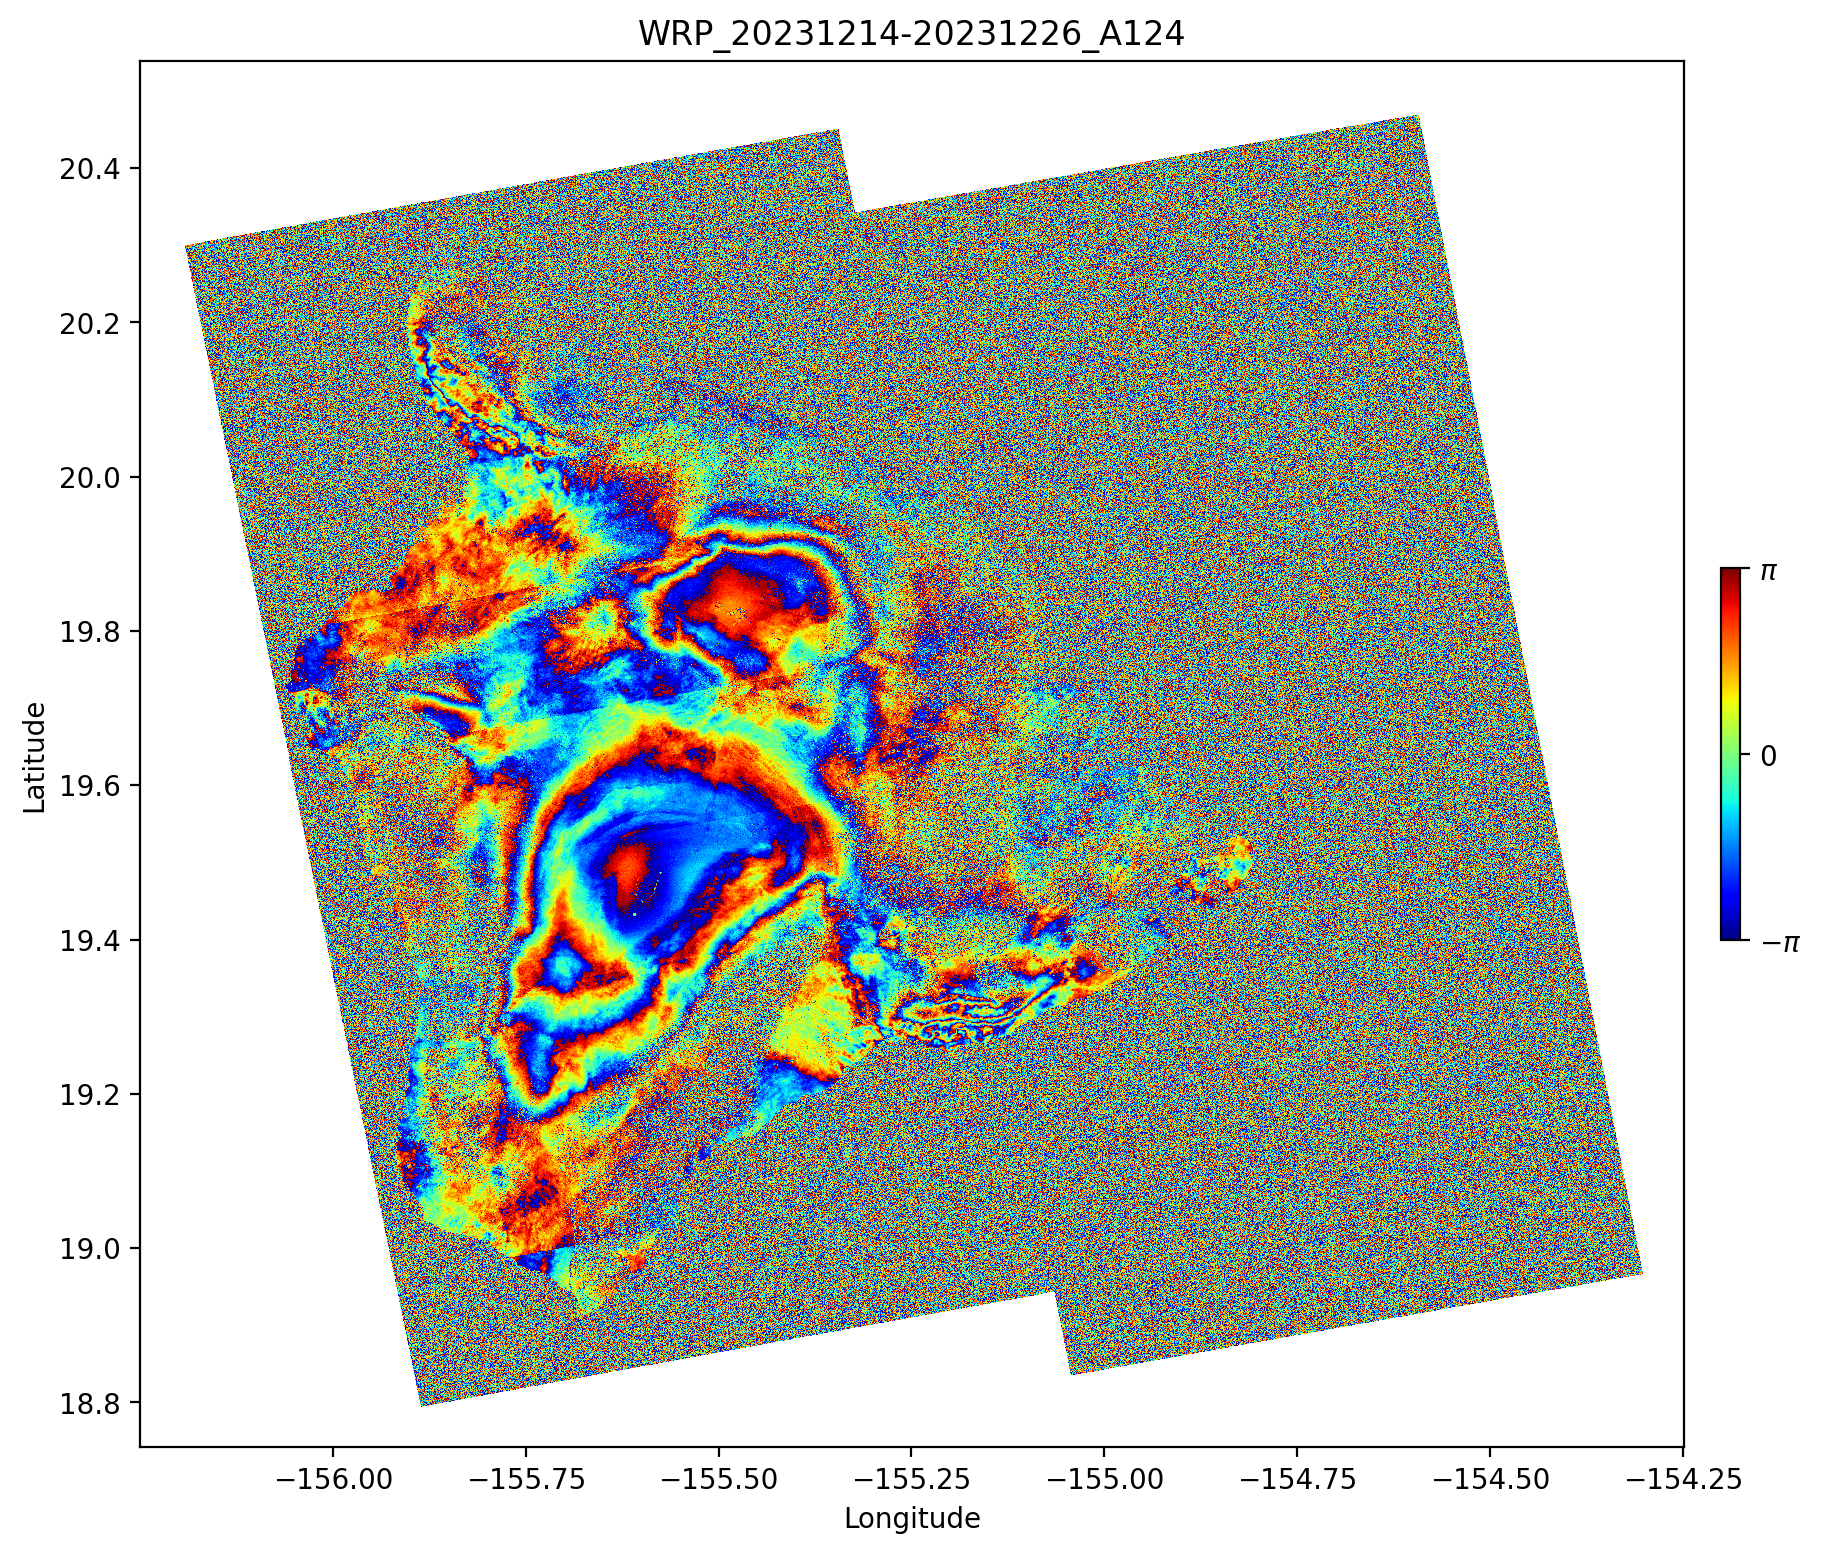

In [19]:
# Define bounding box
bbox = [minlon,maxlon,minlat,maxlat]

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=[12,9])
cax = ax.imshow(merged_ifg, cmap='jet',interpolation='nearest', origin='upper',extent=bbox)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'WRP_{ref}-{sec}_{orbitPass[0]}{pathNumber}',fontsize=12)
cbar = fig.colorbar(cax,orientation='vertical',fraction=0.01,pad=0.02)
cbar.set_ticks([-np.pi, 0., np.pi])
cbar.set_ticklabels([r'$-\pi$', '$0$', r'$\pi$'])
plt.show()

In [20]:
## Set Reference Points
xsize = 0.000277778; ysize = -0.000277778           # Assuming 30-m resolution
refx = 2642; refy = 2700;
reflon = minlon + (refx * xsize)
reflat = maxlat + (refy * ysize)

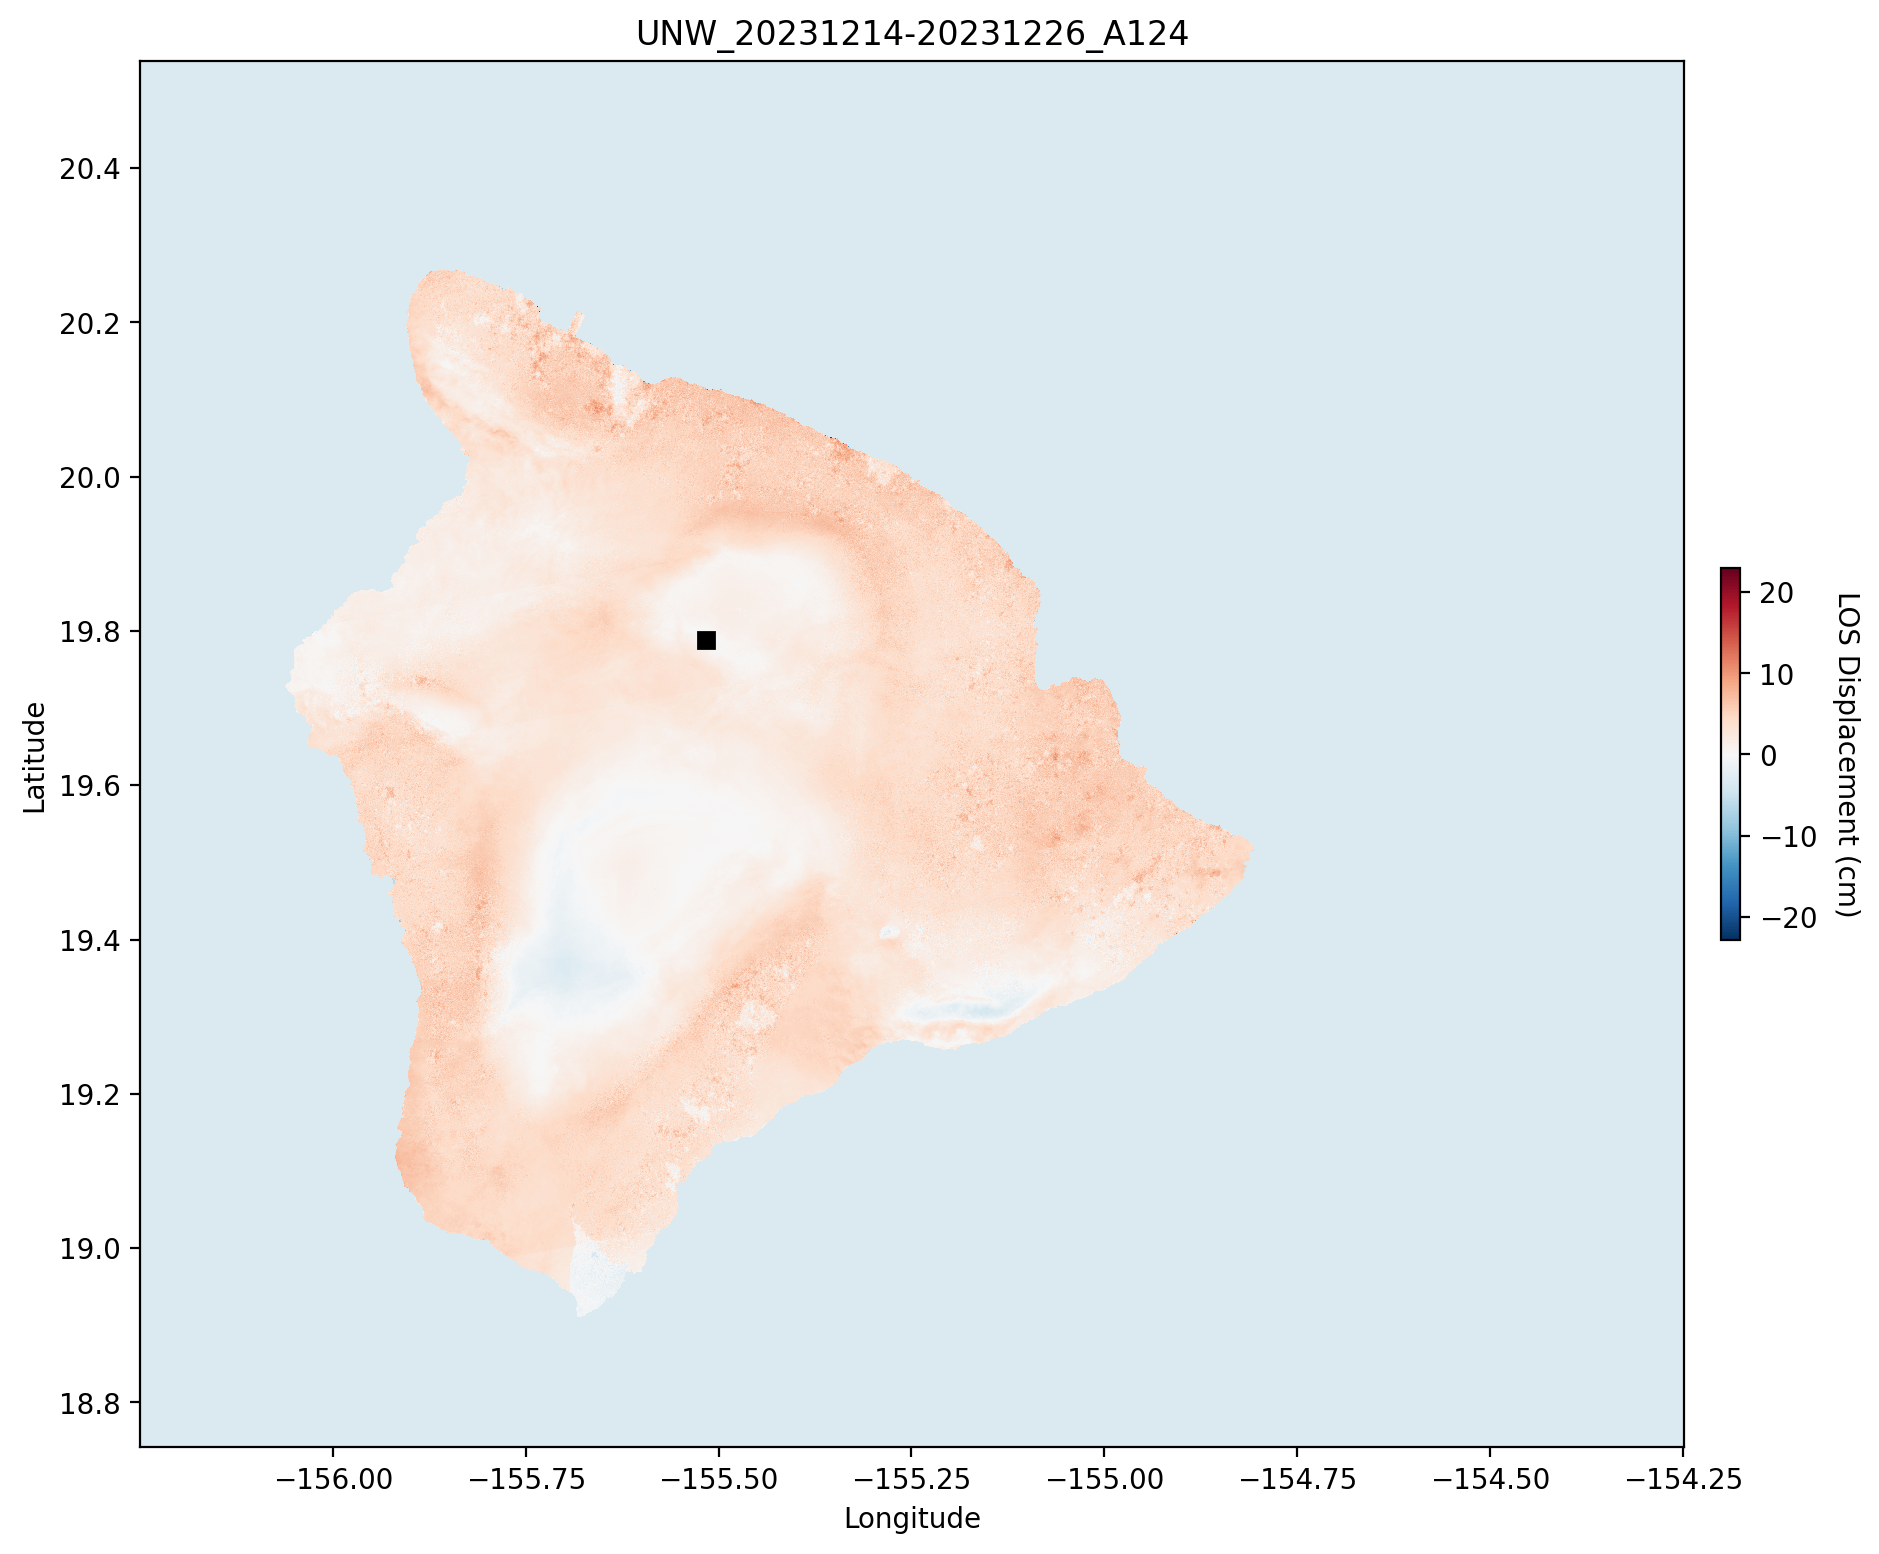

In [21]:
# Plot using Matplotlib
fig, ax = plt.subplots(figsize=[12,9])
merged_unw_cm = merged_unw*100
merged_unw_cm -= merged_unw_cm[refy, refx]              # Reference the data to a point
cax = ax.imshow(merged_unw_cm, cmap='RdBu_r',interpolation='nearest', origin='upper', extent=bbox, vmin=np.min(merged_unw_cm), vmax=-np.min(merged_unw_cm))
ax.plot(reflon, reflat, 'ks')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'UNW_{ref}-{sec}_{orbitPass[0]}{pathNumber}',fontsize=12)
cbar = fig.colorbar(cax,orientation='vertical',fraction=0.01,pad=0.02)
cbar.set_label('LOS Displacement (cm)', rotation=270, labelpad=15)
plt.show()

In [22]:
# Delete temporary "cslc" folder to save storage space
!rm -rvf ./cslc

removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264308-IW2_20231226T043125Z_20231227T075547Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264307-IW2_20231226T043122Z_20231227T075547Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264311-IW2_20231226T043133Z_20231227T075540Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264310-IW2_20231226T043130Z_20231227T075540Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264309-IW2_20231226T043127Z_20231227T075540Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264310-IW3_20231226T043131Z_20231227T075540Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264307-IW3_20231226T043123Z_20231227T075547Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264309-IW3_20231226T043128Z_20231227T075540Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264308-IW3_20231226T043125Z_20231227T075547Z_S1A_VV_v1.0.h5’
removed ‘./cslc/OPERA_L2_CSLC-S1_T124-264306-IW3_20231226T043120Z_20231227T075547Z_S1A_VV_v1.0.h5’
removed ‘.